# **2022 Funding Distribution accorss NSW Public Schools**

The project is to analyse the distribution of government funding to public schools of NSW in 2022, and to analyse the factors have impact on budget distribution.

*Table of Contents*

1. Introduction
2. Data Sources
3. Data Inspection and Cleaning
4. Data Preparation for Analysis
5. Data Analysis
6. Conclusions and Recommendations
7. References



## **1. Introduction**

Public schools is the core system that provides education to students accross NSW, which is funded by NSW government. I always have a passion in education and would like to bring a better understanding on how NSW public education system oprates with funding allocated to each schools, and which factors have impacts on the budget allocation.

In NSW, the Resource Allocation Model (RAM) is a needs-based funding model which uses a base and loading approach to ensure a fair, efficient and transparent allocation of the NSW public education budget for every school.

The RAM methodology is underpinned by 5 principles.

* is based on student and school needs
* is evidence based
* is efficient and transparent
* provides certainty for schools
* is sustainable and adaptable.

**In this project, we will try to find answers for the following questions:**

1. How Budget for Public Schools was distributed across NSW by regions in 2022, detailed by level of schooling?

2. What are the 20 suburbs that have highest budget, and 20 suburbs that have highest number of student enrolments in 2022?

3. What is the proportion of different level of schooling in NSW and the funding they received in 2022?

4. What is the funding per FTE by level of schooling, and whether it has any relationship with attendance rate ?

5. What is the 2022 funding per FTE difference between selective schools and not selective school, and whether it has any relationship with attendance rate ?

6. Is there any relationship between the percentage of Indigenous students and Funding per FTE each Schools received in 2022?

7. Create a visual representation of the distribution of funding to NSW public school in 2022?



## **2. Data Sources**

The project uses below dataset available on the web page of NSW Department of Education

* NSW public schools master dataset. Available at: [link text](https://data.cese.nsw.gov.au/data/dataset/nsw-public-schools-master-dataset/resource/2ac19870-44f6-443d-a0c3-4c867f04c305)
* Resource Allocation Model (RAM) funding table (2022). Available at: [link text](https://data.cese.nsw.gov.au/data/dataset/resource-allocation-model/resource/a7efba8f-fb18-4442-8ddd-f98fd330b997)
* Student attendance rate by individual government school (2011-2022). Available at: [link text](https://data.cese.nsw.gov.au/data/dataset/student-attendance-rate-by-school)



## **3. Data Inspection and Cleaning**

In [19]:
# Import required modules
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### **3.1 NSW public schools master dataset**

The master dataset contains comprehensive information for all government schools in NSW. Data items include school locations, latitude and longitude coordinates, school type, student enrolment numbers, electorate information, contact details and more. The file contains 2216 rows and 44 columns.

In [20]:
nsw_schools = pd.read_csv("master_dataset.csv")
nsw_schools

,School_code,AgeID,School_name,Street,Town_suburb,Postcode,Phone,School_Email,Website,Fax,...,Operational_directorate_office_address,FACS_district,Local_health_district,AECG_region,ASGS_remoteness,Latitude,Longitude,Assets unit,SA4,Date_extracted
0,1001,44402.0,Abbotsford Public School,350 Great North Rd,Abbotsford,2046,9713 6220,abbotsford-p.school@det.nsw.edu.au,https://abbotsford-p.schools.nsw.gov.au,9712 1825,...,"Church St, St Peters 2044","South Eastern Sydney, Northern Sydney & Sydney",Sydney,Metropolitan East,Major Cities of Australia,-33.852728,151.131206,Sydney,Sydney - Inner West,2023-08-07
1,1002,49333.0,Aberdeen Public School,Segenhoe St,Aberdeen,2336,6543 7271,aberdeen-p.school@det.nsw.edu.au,https://aberdeen-p.schools.nsw.gov.au,6543 7712,...,"Level 1, 2 Caroline Pl, Maitland 2320",Hunter New England & Central Coast,Hunter New England,Hunter,Inner Regional Australia,-32.166098,150.888095,Hunter/Central Coast,Hunter Valley exc Newcastle,2023-08-07
2,1003,49299.0,Abermain Public School,Goulburn St,Abermain,2326,4930 4210,abermain-p.school@det.nsw.edu.au,https://abermain-p.schools.nsw.gov.au,4930 4319,...,"Level 1, 2 Caroline Pl, Maitland 2320",Hunter New England & Central Coast,Hunter New England,Hunter,Major Cities of Australia,-32.808920,151.426499,Hunter/Central Coast,Hunter Valley exc Newcastle,2023-08-07
3,1007,50425.0,Adaminaby Public School,9 Cosgrove Street,ADAMINABY,2629,6454 2265,adaminaby-p.school@det.nsw.edu.au,https://adaminaby-p.schools.nsw.gov.au,6454 2552,...,"Level 1, City Link Plaza, 24-36 Morisset St, Q...",Illawarra Shoalhaven & Southern NSW,Southern NSW,Lower South Coast,Outer Regional Australia,-35.993292,148.776721,Southern NSW,Capital Region,2023-08-07
4,1008,49043.0,Adamstown Public School,Bryant St,Adamstown,2289,4957 1114,adamstown-p.school@det.nsw.edu.au,https://adamstown-p.schools.nsw.gov.au,4956 2446,...,"40-44 Coral Cr, Gateshead West 2290",Hunter New England & Central Coast,Hunter New England,Hunter,Major Cities of Australia,-32.932213,151.730971,Hunter/Central Coast,Newcastle and Lake Macquarie,2023-08-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,8916,86431.0,Oran Park High School,1 Podium Way,ORAN PARK,2570,4634 7700,oranpark-h.school@det.nsw.edu.au,https://oranpark-h.schools.nsw.gov.au,NaN,...,"Roy Watts Rd, Glenfield 2167",South Western Sydney,South Western Sydney,NaN,Major Cities of Australia,-33.998988,150.736305,NaN,Sydney - South West,2023-08-07
2212,8917,50547.0,Murrumbidgee Regional High School,1-39 Poole Street,Griffith,2680,02 6969 9300,murrumbidgee-h.school@det.nsw.edu.au,https://murrumbidgee-h.schools.nsw.gov.au,NaN,...,"Government Offices, 104-110 Banna Ave, Griffit...","Murrumbidgee, Far West & Western NSW",Murrumbidgee,Riverina 1,Outer Regional Australia,-34.282315,146.070718,NaN,Riverina,2023-08-07
2213,8919,88427.0,Bungendore High School,Cnr Majara Street & Kings Hwy,Bungendore,2621,NaN,bungendore-h.school@det.nsw.edu.au,https://bungendore-h.schools.nsw.gov.au/,NaN,...,"Level 1, City Link Plaza, 24-36 Morisset St, Q...",NaN,NaN,NaN,Inner Regional Australia,-35.253603,149.445707,NaN,Capital Region,2023-08-07
2214,8922,88435.0,Jerrabomberra High School,Coachwood Ave,Jerrabomberra,2619,NaN,jerra-h.school@det.nsw.edu.au,https://jerra-h.schools.nsw.gov.au/,NaN,...,"Level 1, City Link Plaza, 24-36 Morisset St, Q...",NaN,NaN,NaN,Major Cities of Australia,-35.388310,149.193594,NaN,Capital Region,2023-08-07


Below is the details of columns used for the analysis:

* **School_code:** is unique and can be used as index

* **Town_suburb:** including 1608 suburb values

* **latest_year_enrolment_FTE:** 2022 enrollment FTE

* **Indigenous_pct:** Percentage of Indigenous students

* **Level_of_schooling:** including 7 values:

        Primary School
        Secondary School
        Schools for Specific Purposes
        Central/Community School
        Environmental Education Centre
        Infants School
        Other School

* **Local_health_district:** including 16 region values

* **Selective_school:** including 3 values:

        Not Selective
        Partially Selective
        Fully Selective

* **Latitude:**

* **Longitude:**




In [21]:
# check value of column Town_suburb
nsw_schools['Town_suburb'].value_counts()

Blacktown          11
Wagga Wagga        11
Goulburn            9
Dubbo               8
Campbelltown        8
                   ..
Mount Victoria      1
Mount Kembla        1
Mount Keira         1
Osterley            1
Jerrabomberra       1
Name: Town_suburb, Length: 1608, dtype: int64

In [22]:
# check value of column Level_of_schooling
nsw_schools['Level_of_schooling'].value_counts()

Primary School                    1589
Secondary School                   405
Schools for Specific Purposes      117
Central/Community School            67
Environmental Education Centre      22
Infants School                      14
Other School                         2
Name: Level_of_schooling, dtype: int64

In [23]:
# check value of column Local_health_district
nsw_schools['Local_health_district'].value_counts()

Hunter New England       377
South Western Sydney     247
Western Sydney           185
Murrumbidgee             172
Northern Sydney          159
Western NSW              157
South Eastern Sydney     154
Northern NSW             138
Nepean Blue Mountains    119
Illawarra Shoalhaven     118
Sydney                   110
Southern NSW              85
Mid North Coast           81
Central Coast             77
Far West                  26
Unknown                    1
Name: Local_health_district, dtype: int64

In [24]:
# check value of column Selective_school
nsw_schools['Selective_school'].value_counts()

Not Selective          2169
Partially Selective      26
Fully Selective          21
Name: Selective_school, dtype: int64

### **3.2 Resource Allocation Model (RAM) funding table (2022)**

The Resource Allocation Model (RAM) was developed to ensure a fair, efficient and transparent allocation of the state public education budget for every school. The model recognises that students and school communities are not all the same and that they have different needs which require different levels of support.

The original file includes 2217 rows and 4 columns. After drop NaN value, remaining data frame has 2216 rows and 2 columns selected for analysis.

In [25]:
fundings = pd.read_csv('data-hub-2022-approved-ram.csv')

# remame column for merging data
fundings = fundings.rename(columns = {'School Code': 'School_code', 
'RAM Funding - post Adjustments $': '2022_Funding'})

# select only columns needed for analysis
fundings = fundings[['School_code', '2022_Funding']]

# filter to exclude row with NaN value
fundings = fundings.dropna()

# define a function to change value of funding column to integer
def to_int(text):
    text = text.replace('$','')
    text = text.replace(',', '')
    text = int(text)
    return text

# change columns value to integer
fundings['2022_Funding'] = fundings['2022_Funding'].apply(to_int)
fundings['School_code'] = fundings['School_code'].astype(int)

fundings

,School_code,2022_Funding
0,1001,370881
1,1002,514304
2,1003,825849
3,1007,45277
4,1008,316178
...,...,...
2211,8913,440253
2212,8914,33147
2213,8915,2304720
2214,8916,1115085


### **3.3 Student attendance rate by individual government school (2011-2022)**

The attendance rate is defined as the number of actual full-time equivalent student days attended by full-time students in Years 1–10 as a percentage of the total number of possible student-days attended in Semester 1.

Data is suppressed "sp" for schools where student numbers are below the reporting threshold.

Data is not available "na" for senior secondary schools or other schools where no students were enrolled in Years 1-10.

Blank cells indicate no students were enrolled at the school that census year or the school was out of scope for attendance reporting.

The original file includes 2214 rows and 13 columns. After drop NaN and non numeric values, remaining data frame has 2126 rows and 2 columns selected for analysis.

In [26]:
attendance = pd.read_csv('2022-attendance-data-final.csv')

# remame column for merging data
attendance = attendance.rename(columns = {'school_code': 'School_code', '2022': '2022_attendance'})

# select only columns needed for analysis
attendance = attendance[['School_code', '2022_attendance']]

# filter to exclude row with NaN value
attendance = attendance.dropna()

# filter to exclude rows not number
attendance = attendance[(attendance['2022_attendance'] != 'sp') & (attendance['2022_attendance'] !='na')]

# change column School_code to integer and column 2022 value to float type
attendance['School_code'] = attendance['School_code'].astype('int')
attendance['2022_attendance'] = attendance['2022_attendance'].astype('float')

attendance

,School_code,2022_attendance
0,1001,89.0
1,1002,83.9
2,1003,85.2
3,1007,75.7
4,1008,87.5
...,...,...
2208,4131,88.0
2209,3563,86.9
2210,4124,89.7
2211,5460,29.4


## **4. Data Preparation for Analysis**

In [27]:
# merge 3 data frames with default, only showing rows of matching values
full_data = pd.merge(nsw_schools, fundings, on = 'School_code')
full_data = pd.merge(full_data, attendance, on = 'School_code')

# set index and rename columns
full_data = full_data.set_index('School_code')
full_data = full_data.rename(columns = {'latest_year_enrolment_FTE': '2022_enrolment_FTE', 'Local_health_district': 'Regions'})

# add new column for 2022_Funding_per_FTE
full_data['2022_Funding_per_FTE'] = full_data['2022_Funding']/full_data['2022_enrolment_FTE']

full_data

,AgeID,School_name,Street,Town_suburb,Postcode,Phone,School_Email,Website,Fax,2022_enrolment_FTE,...,AECG_region,ASGS_remoteness,Latitude,Longitude,Assets unit,SA4,Date_extracted,2022_Funding,2022_attendance,2022_Funding_per_FTE
School_code,,,,,,,,,,,,,,,,,,,,,
1001,44402.0,Abbotsford Public School,350 Great North Rd,Abbotsford,2046,9713 6220,abbotsford-p.school@det.nsw.edu.au,https://abbotsford-p.schools.nsw.gov.au,9712 1825,474.0,...,Metropolitan East,Major Cities of Australia,-33.852728,151.131206,Sydney,Sydney - Inner West,2023-08-07,370881,89.0,782.449367
1002,49333.0,Aberdeen Public School,Segenhoe St,Aberdeen,2336,6543 7271,aberdeen-p.school@det.nsw.edu.au,https://aberdeen-p.schools.nsw.gov.au,6543 7712,166.0,...,Hunter,Inner Regional Australia,-32.166098,150.888095,Hunter/Central Coast,Hunter Valley exc Newcastle,2023-08-07,514304,83.9,3098.216867
1003,49299.0,Abermain Public School,Goulburn St,Abermain,2326,4930 4210,abermain-p.school@det.nsw.edu.au,https://abermain-p.schools.nsw.gov.au,4930 4319,265.0,...,Hunter,Major Cities of Australia,-32.808920,151.426499,Hunter/Central Coast,Hunter Valley exc Newcastle,2023-08-07,825849,85.2,3116.411321
1007,50425.0,Adaminaby Public School,9 Cosgrove Street,ADAMINABY,2629,6454 2265,adaminaby-p.school@det.nsw.edu.au,https://adaminaby-p.schools.nsw.gov.au,6454 2552,12.0,...,Lower South Coast,Outer Regional Australia,-35.993292,148.776721,Southern NSW,Capital Region,2023-08-07,45277,75.7,3773.083333
1008,49043.0,Adamstown Public School,Bryant St,Adamstown,2289,4957 1114,adamstown-p.school@det.nsw.edu.au,https://adamstown-p.schools.nsw.gov.au,4956 2446,361.0,...,Hunter,Major Cities of Australia,-32.932213,151.730971,Hunter/Central Coast,Newcastle and Lake Macquarie,2023-08-07,316178,87.5,875.839335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8911,70233.0,The Ponds High School,180 Riverbank Drive,The Ponds,2769,9626 3562,theponds-h.school@det.nsw.edu.au,https://theponds-h.schools.nsw.gov.au,9837 0823,1948.0,...,Metropolitan West,Major Cities of Australia,-33.705259,150.906931,Western Sydney,Sydney - Blacktown,2023-08-07,1132025,86.9,581.121663
8913,86429.0,Inner Sydney High School,Cnr Cleveland St & Chalmers St,Surry Hills,2010,9578 2020,innersydney-h.school@det.nsw.edu.au,https://innersydneyhighschool.schools.nsw.gov.au,NaN,591.0,...,NaN,Major Cities of Australia,-33.889372,151.206030,NaN,Sydney - City and Inner South,2023-08-07,440253,86.1,744.928934
8915,46436.0,Armidale Secondary College,182 Butler Street,Armidale,2350,02 6776 7400,armidale-s.school@det.nsw.edu.au,https://armidale-s.schools.nsw.gov.au,NaN,1123.0,...,North Western 2,Inner Regional Australia,-30.519371,151.650348,NaN,New England and North West,2023-08-07,2304720,80.8,2052.288513


## **5. Data Analysis**

### **5.1 How Budget for Public Schools was distributed across NSW by regions in 2022, detailed by level of schooling?**

<Axes: title={'center': 'Funding distribution accross NSW regions by level of schooling in 2022'}, xlabel='Budget', ylabel='Regions'>

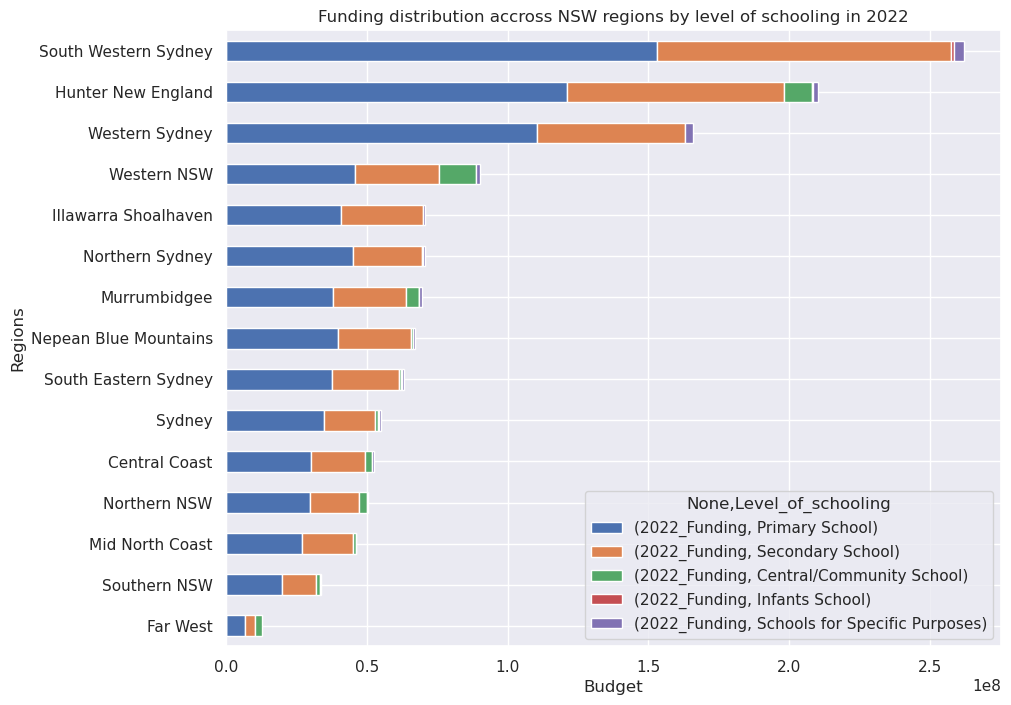

In [28]:
df1_fundings = full_data[['2022_Funding', 'Regions', 'Level_of_schooling']]

# group by Regions and Level_of_schooling, then unstack
df1_fundings = df1_fundings.groupby(['Regions', 'Level_of_schooling']).sum()
df1_fundings = df1_fundings.unstack()

# Replace NaNs with 0s
df1_fundings = df1_fundings.fillna(0)

# Rearrange columns
df1_fundings = df1_fundings[[
    ('2022_Funding',                'Primary School'),
    ('2022_Funding',              'Secondary School'),
    ('2022_Funding',      'Central/Community School'),
    ('2022_Funding',                'Infants School'),
    ('2022_Funding', 'Schools for Specific Purposes'),
    
]]

# create new column total funding
df1_fundings['Total_Funding'] = df1_fundings.iloc[:, 0:4].sum(axis=1)

# sort by total funding in decending order
df1_fundings = df1_fundings.sort_values(
    by = 'Total_Funding',
    ascending = True,
)

# drop Total_Funding column to prepare for the stacked bar chart
df1_fundings = df1_fundings.drop('Total_Funding', axis = 1)

# create stacked horizontal bar plot
df1_fundings.plot(
    kind = 'barh',
    stacked = True,
    figsize = [10, 8],
    xlabel = 'Budget',
    title = 'Funding distribution accross NSW regions by level of schooling in 2022'
)


**Answer:** South Western Sydney received the biggest budget while Far West area received the smallest budget, with more than $250M and only $12.8M respectively.
In the same regions, primary schools had received more funding than secondary schools, followed by other level of schoolings.

**5.2 What are the 20 suburbs that have highest budget, and 20 suburbs that have highest number of student enrolments in 2022?**

<Axes: title={'center': 'The 20 suburbs with highest funding in 2022'}, xlabel='Budget', ylabel='Town_suburb'>

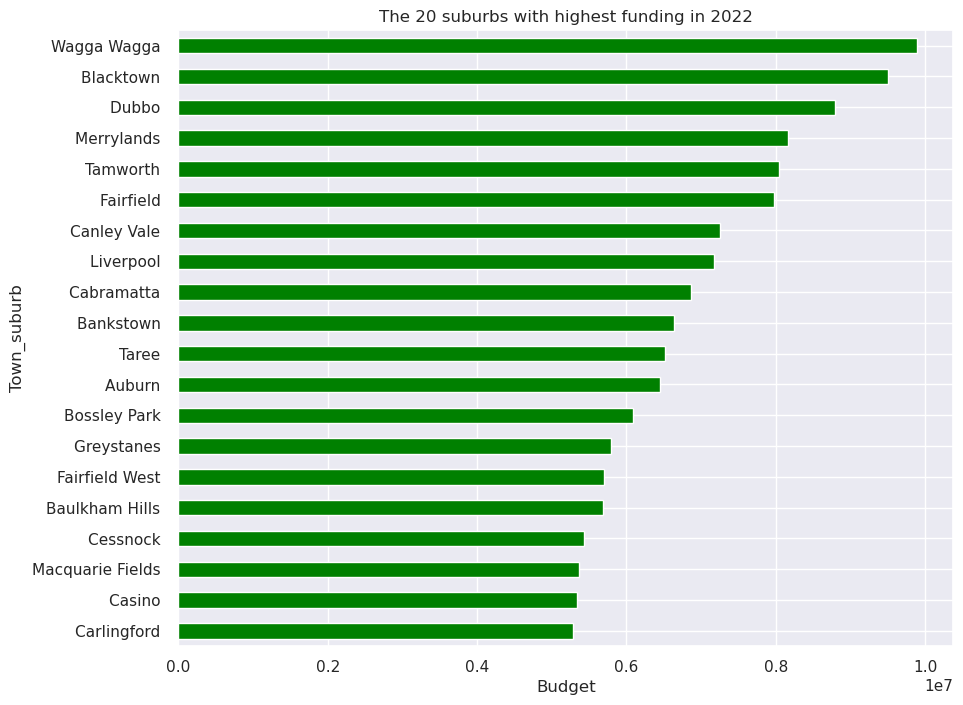

In [29]:
# select data for suburds and fundings
df2_funding = full_data[['Town_suburb', '2022_Funding']]
df2_funding = df2_funding.groupby('Town_suburb').sum()

# sort value in ascending order
df2_funding = df2_funding.sort_values(
    by = '2022_Funding',
    ascending = True
)

# select top 20 suburbs have highest budget
df2_funding = df2_funding.tail(20)

# create a horizontal bar chart for the top 20 budget suburbs
df2_funding.plot(
 kind = 'barh',
 legend = False,
 figsize = [10, 8],
 color = 'green',
 xlabel = 'Budget',
 title = 'The 20 suburbs with highest funding in 2022'
)


In [30]:
# List down the regions of top 20 suburbs with highest funding in 2022
df2_suburbs = df2_funding.drop('2022_Funding', axis = 1)
df2_suburbs = df2_suburbs.merge(full_data, on = 'Town_suburb')
df2_suburbs = df2_suburbs[['Town_suburb', 'Regions']]

# remove duplicate values
df2_suburbs = df2_suburbs[df2_suburbs.duplicated() == False]
df2_suburbs

,Town_suburb,Regions
0,Carlingford,Northern Sydney
1,Carlingford,Western Sydney
6,Casino,Northern NSW
9,Macquarie Fields,South Western Sydney
14,Cessnock,Hunter New England
18,Baulkham Hills,Western Sydney
25,Fairfield West,South Western Sydney
27,Greystanes,Western Sydney
33,Bossley Park,South Western Sydney
36,Auburn,Western Sydney


<Axes: title={'center': 'The 20 suburbs with highest enrollments in 2022'}, xlabel='Number of Enrollments', ylabel='Town_suburb'>

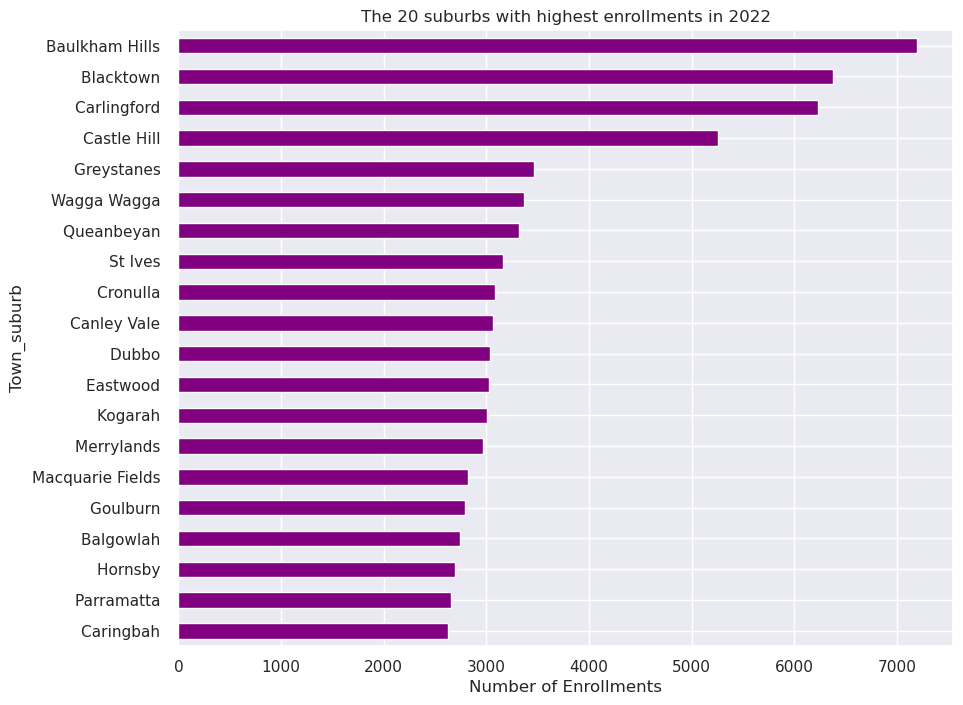

In [31]:
# select data for suburds and enrollments
df2_enrollment = full_data[['Town_suburb', '2022_enrolment_FTE']]
df2_enrollment = df2_enrollment.groupby('Town_suburb').sum()

# sort value in ascending order
df2_enrollment = df2_enrollment.sort_values(
    by = '2022_enrolment_FTE',
    ascending = True
)

# select top 20 suburbs have highest budget
df2_enrollment = df2_enrollment.tail(20)

# create a horizontal bar chart for the top 20 budget suburbs
df2_enrollment.plot(
 kind = 'barh',
 legend = False,
 figsize = [10, 8],
 color = 'purple',
 xlabel = 'Number of Enrollments',
 title = 'The 20 suburbs with highest enrollments in 2022'
)

**Answer:** The suburb with highest funding in 2022 - Wagga Wagga is not the same with the suburb with highest number of student enrollments - Baulkham Hills. 

In the list of top 20 suburbs with highest funding, there are many suburbs are not in the list of top 20 suburbs with highest enrollments, including: Tamworth, Fairfield, Liverpool, Cabramatta, Bankstown, Taree, Arburn, Bossley Park, Fairfield West, Cessnock, Casino, majority of them are in South Western Sydney region.

**5.3 What is the proportion of different level of schooling in NSW and the funding they received in 2022?**

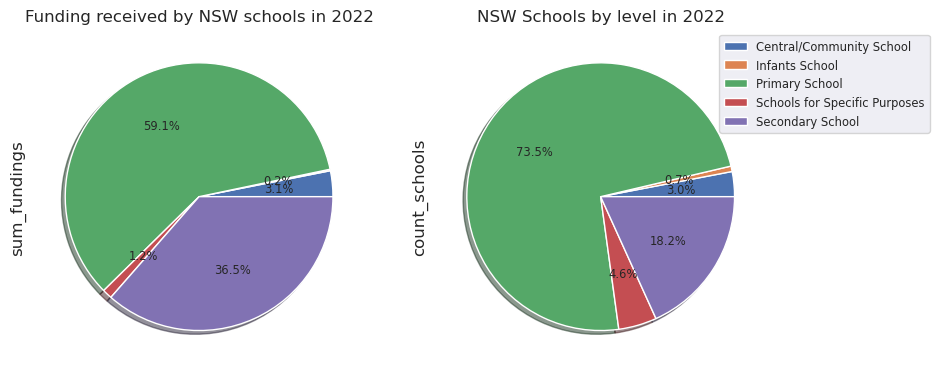

In [32]:
# select columns, sum by funding and count number of schools
df3 = full_data[['Level_of_schooling','2022_Funding']]
df3 = df3.groupby(['Level_of_schooling']).agg(
    sum_fundings=('2022_Funding', np.sum),
    count_schools=('Level_of_schooling', np.count_nonzero))

# create 2 pie charts for proportion of funding and number of schools
df3.plot(
    kind = 'pie',
    subplots = True,
    legend = False,
    autopct="%.1f%%",
    figsize = [9.5, 8.5],
    labels = None,
    fontsize = 'x-small',
    shadow=True,
    title = ['Funding received by NSW schools in 2022', 'NSW Schools by level in 2022'])

# format legend
plt.legend(labels=df3.index, loc = 'best', bbox_to_anchor=(1, 0., 0.5, 1), fontsize = 'x-small')


**Answer:** Primary schools is accounted for 73.5% of total public schools in NSW but only received 59.1% budget, while secondary schools proportion is only 18.2% but received up to 36.5% of total budget. Infants schools have small funding portion of 1.2%.

**5.4 What is the funding per FTE by level of schooling, and whether it has any relationship with attendance rate ?**

<Axes: ylabel='Attendance Rate'>

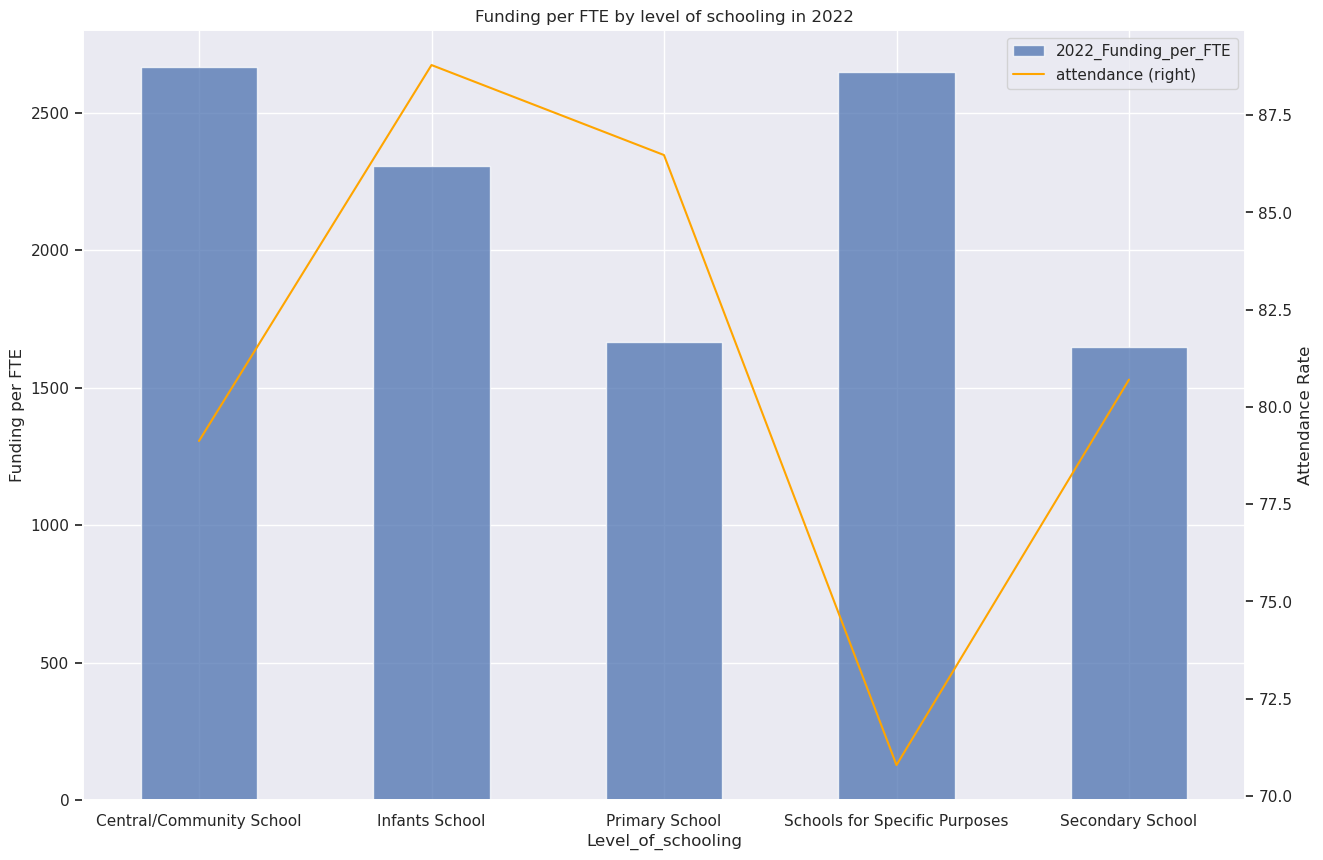

In [33]:
# Select the columns for plotting
df4 = full_data[['Level_of_schooling','2022_Funding', '2022_attendance', '2022_enrolment_FTE']]
df4 = df4.groupby('Level_of_schooling').agg(
    sum_fundings=('2022_Funding', np.sum),
    sum_enrollment = ('2022_enrolment_FTE', np.sum),
    attendance=('2022_attendance', np.mean))

# create new column 2022_Funding_per_FTE
df4['2022_Funding_per_FTE'] = df4['sum_fundings']/df4['sum_enrollment']

avg_funding_per_FTE = df4['2022_Funding_per_FTE']
avg_attendace_rate = df4['attendance']

# create 2 plots on the same axes
avg_funding_per_FTE.plot(
    kind='bar',
    legend = True,
    alpha=0.75,
    ylabel = 'Funding per FTE',
    figsize = [15, 10],
    title = 'Funding per FTE by level of schooling in 2022'
)

avg_attendace_rate.plot(
    kind = 'line',
    secondary_y = True, # Use a separate y-axis
    legend = True,
    ylabel = 'Attendance Rate',
    color = 'orange'
)


**Answer:** Funding per FTE of Primary Schools and Secondary Schools are the same at around AU1600/FTE/year, followed by Infants Schools at AU2300/FTE/year, and Central/Community School and Schools for Specific Purposes at AU2600/FTE/year.

Average attedance rate is highest at Infants Schools and lowest at Schools for Specific Purposes, and it seems not related to funding per FTE for each level of schooling.

**5.5 What is the 2022 funding per FTE difference between selective schools and not selective school, and whether it has any relationship with attendance rate ?**

<Axes: ylabel='Attendance Rate'>

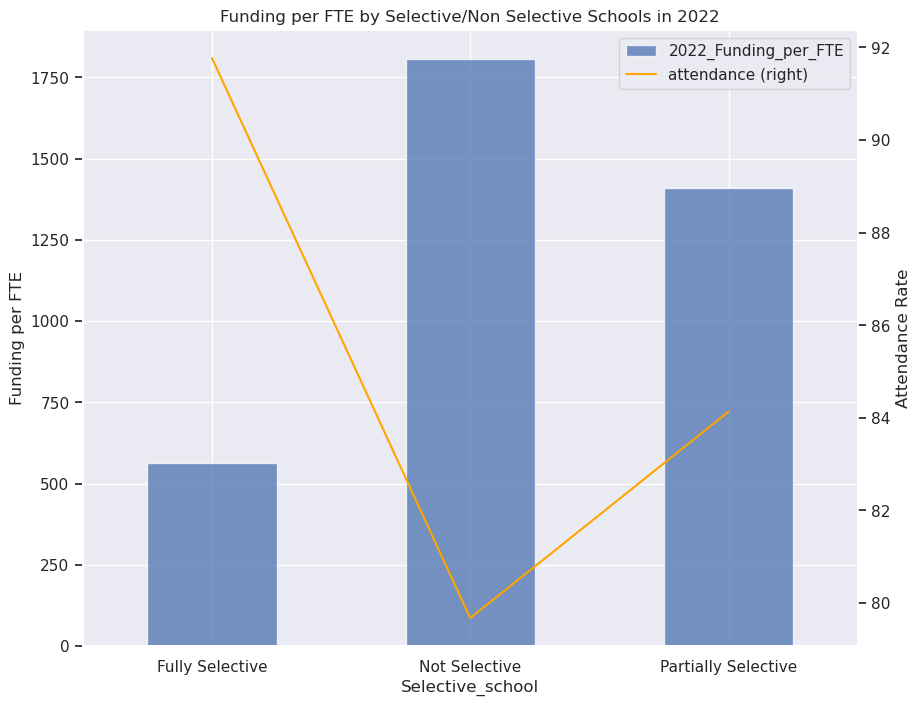

In [37]:
df5 = full_data[['Level_of_schooling','Selective_school', '2022_attendance', '2022_Funding', '2022_enrolment_FTE']]

# to check the value of Selective_school column
df5['Selective_school'].value_counts() #result: 'Not Selective','Partially Selective','Fully Selective'

# to check which schools level has selective schools
df_check = df5[df5['Selective_school'] !='Not Selective']
df_check['Level_of_schooling'].value_counts() #result: 'Secondary School', 'Central/Community School'

# to compare apple to apple, only select Secondary School and Central/Community School for the plot
df5 = df5[(df5['Level_of_schooling'] == 'Secondary School') | (df5['Level_of_schooling'] == 'Central/Community School')]

df5 = df5.groupby('Selective_school').agg(
    sum_fundings=('2022_Funding', np.sum),
    sum_enrollment = ('2022_enrolment_FTE', np.sum),
    attendance=('2022_attendance', np.mean))

df5['2022_Funding_per_FTE'] = df5['sum_fundings']/df5['sum_enrollment']

avg_funding_per_FTE_5 = df5['2022_Funding_per_FTE']
avg_attendace_rate_5 = df5['attendance']

# create 2 plots on the same axes
avg_funding_per_FTE_5.plot(
    kind='bar',
    legend = True,
    alpha=0.75,
    ylabel = 'Funding per FTE',
    figsize = [10, 8],
    title = 'Funding per FTE by Selective/Non Selective Schools in 2022'
)

avg_attendace_rate_5.plot(
    kind = 'line',
    secondary_y = True, # Use a separate y-axis
    legend = True,
    ylabel = 'Attendance Rate',
    color = 'orange'
)

**Answer:** Fully Selective Schools have lowest funding per FTE at AUD 550/year and highest attendance rate of 92%, while Non Selective Schools have the highest funding per FTE at AUD 1800/year but lowest attendance rate of 80%. Partially Selective School is in the middle range, with funding per FTE at 1400/year and attendance rate of 84%. The result shows that budget allocated is higher for school with lower attendance rate.

**5.6 Is there any relationship between the percentage of Indigenous students and Funding per FTE each Schools received in 2022?**

0.8048707451685853

<Figure size 1000x800 with 0 Axes>

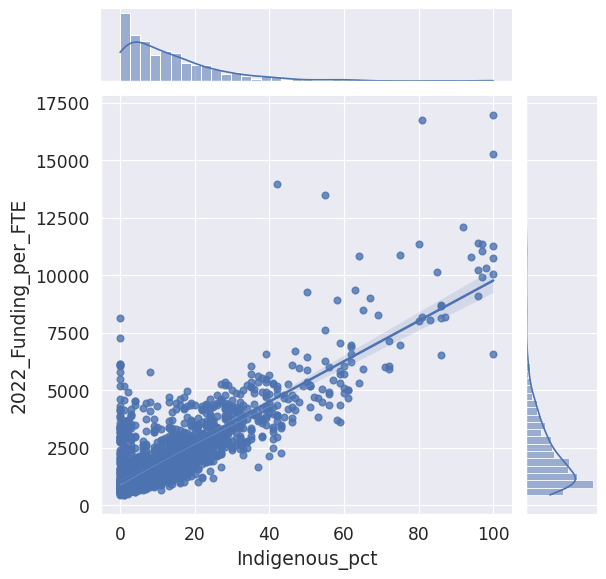

In [35]:
df6 = full_data[['Indigenous_pct', '2022_Funding_per_FTE', '2022_Funding']]

# filter to exclude non numeric value, then convert to float
df6 = df6[df6['Indigenous_pct'] != 'np']
df6['Indigenous_pct'] = df6['Indigenous_pct'].astype('float')

# create a jointplot, including regression line
plt.figure(figsize = (10,8))
sns.set_context ('paper', font_scale = 1.4)

sns.jointplot(
    data = df6,
    kind = 'reg',
    x = 'Indigenous_pct',
    y = '2022_Funding_per_FTE',
)

# calculate correlation value
df6['Indigenous_pct'].corr(df6['2022_Funding_per_FTE'])

Answer: The jointplot and correlation value of 0.8 indicates that there is strong relationship between the percentage of Indigenous students and Funding per FTE each Schools received in 2022. The higher percentage of Indigenous students, the higher budget schools received.

**5.7 Create a visual representation of the distribution of funding to NSW public school in 2022?**

<Figure size 1000x800 with 0 Axes>

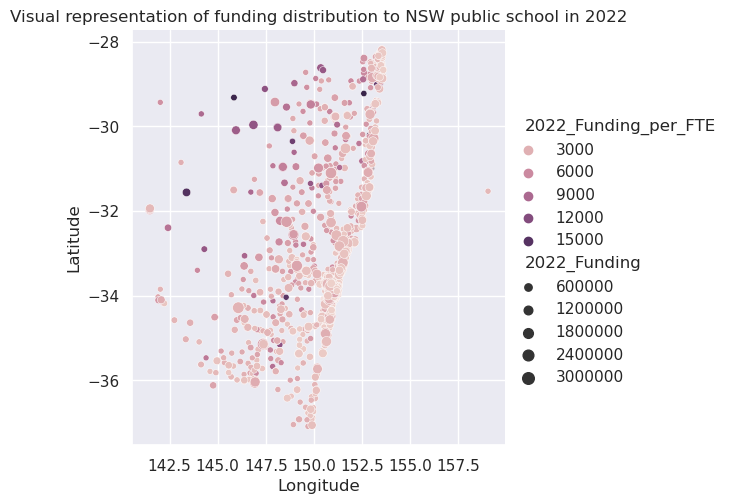

In [36]:
df7 = full_data[['2022_Funding', '2022_Funding_per_FTE', 'Longitude', 'Latitude']]

# create a scatter plot using longtitude and latitude
plt.figure(figsize = (10,8))
sns.set()
sns.relplot(
    data = df7,
    kind = 'scatter',
    x = 'Longitude',
    y = 'Latitude',
    hue = '2022_Funding_per_FTE',
    size = '2022_Funding',
).set(title='Visual representation of funding distribution to NSW public school in 2022')


**Answer:** The plot shows lower funding per FTE each schools along the east coast received, and higher funding per FTE moving to the west. This is inline with the distribution of NSW population, where most people live in coastal areas, hence the budget per headcount is lower than those in the west.

**6. Conclusions and Recommendations**

Overall, the analysis highlights the budget allocation in 2022 of NSW Public Schools. 

The Q1 covers the funding distribution by different regions, in which South Western Sydney has the biggest budget in 2022. 

Q2 compares list of top 20 suburbs with highest funding allocation versus list of top 20 suburbs with highest number of student enrollments. The result shows that many suburbs not in the list of top enrollments but are in the list of top fundings, these suburbs mostly from South Westner Sydney region.

Q3 compares the proportion of funding received by level of schoolings with the proportion of number of schools by level. The result shows that Primary Schools and Secondary Schools received the two biggest budget.

Q4 then calculate funding per FTE of schools by level and not suprisingly, Primary Schools and Secondary Schools was allocated smallest amount budget per student.

Q5 deep dives to the analysis of funding per FTE split by Selective and Non Selective Schools. The result of budget per FTE of Selective Schools is much smaller compared to the one of Non Selective Schools, while attendance rate showing other way around.

Q6 found the correlation between funding per FTE and percentage of Indigenous students. Schools with higher Indigenous percentage received more funding per FTE.

Q7 draws a visual representation of the distribution of funding to NSW public school in 2022, with lower funding per student in the east and higher one in the west of NSW.

Resources Allocation Model is a needs-based funding model, taking into accounts the unique needs of each students and other factors location, socio-economic background, aboriginal background, english language proficiency, adjustment for disability, refugee student support ...This analysis could not cover the funding distribution accorss NSW Public School completely due to the lack of detailed data. Future analysis can focus on the above listed factors.



**7. References**

NSW Government, Department of Education, *Resource Allocation Model*, accessed 12 August 2023, https://education.nsw.gov.au/about-us/strategies-and-reports/schools-funding/resource-allocation-model

NSW Government, *Student attendance rate by individual government school (2011-2022)*, accessed 12 August 2023, https://data.cese.nsw.gov.au/data/dataset/student-attendance-rate-by-school

NSW Government, *Master dataset: NSW government school locations and student enrolment numbers*, accessed 12 August 2023, https://data.cese.nsw.gov.au/data/dataset/nsw-public-schools-master-dataset

NSW Government, *Resource Allocation Model (RAM) funding table*, accessed 12 August 2023, https://data.cese.nsw.gov.au/data/dataset/resource-allocation-model

